<a href="https://colab.research.google.com/github/usmanbahadar/customer-churn-prediction-ml/blob/main/CIFAR10_Classification_UsmanBahadar_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classification using CNN
This project uses a Convolutional Neural Network (CNN) to classify images into 10 categories using the CIFAR-10 dataset.

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


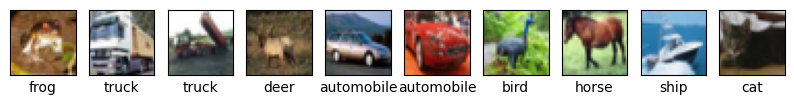

In [3]:
# Step 3: Visualize Sample Images
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
# Step 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Step 5: Compile and Train Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3768 - loss: 1.6985 - val_accuracy: 0.5793 - val_loss: 1.1911
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5994 - loss: 1.1371 - val_accuracy: 0.6350 - val_loss: 1.0481
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6500 - loss: 1.0027 - val_accuracy: 0.6214 - val_loss: 1.0851
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.6806 - loss: 0.9140 - val_accuracy: 0.6485 - val_loss: 1.0114
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7037 - loss: 0.8464 - val_accuracy: 0.6752 - val_loss: 0.9352
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7295 - loss: 0.7800 - val_accuracy: 0.6881 - val_loss: 0.9039
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7486 - loss: 0.7286 - val_accuracy: 0.6880 - val_loss: 0.9054
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7576 -

In [6]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6937 - loss: 0.9129
Test Accuracy: 0.6869000196456909


In [7]:
# Step 7: Generate Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()
print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

    airplane       0.71      0.76      0.73      1000
  automobile       0.83      0.80      0.82      1000
        bird       0.57      0.57      0.57      1000
         cat       0.55      0.45      0.49      1000
        deer       0.60      0.64      0.62      1000
         dog       0.65      0.53      0.59      1000
        frog       0.65      0.82      0.73      1000
       horse       0.75      0.71      0.73      1000
        ship       0.79      0.80      0.80      1000
       truck       0.74      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



**End of CIFAR-10 Project by Usman Bahadar**